<a href="https://colab.research.google.com/github/sivasaiyadav8143/TensorFlow-2.x/blob/main/Predict_Ice_Cream_Sales_Using_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example, we will cover regression in more details in future projects. 


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [1]:
# !pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sales_df = pd.read_csv('/content/drive/MyDrive/Data/SalesData.csv')

In [5]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP #2: VISUALIZE DATASET

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


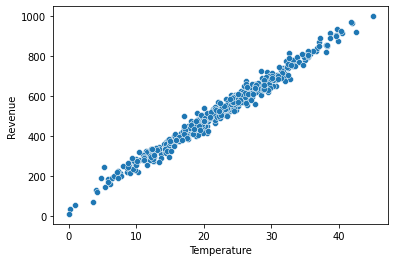

In [10]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [11]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

# STEP#4: BUILD AND TRAIN THE MODEL

In [12]:
X_train.shape

(500,)

In [13]:
y_train.shape

(500,)

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [25]:
epochs_hist = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
16/16 [==============================] - 0s 2ms/step - loss: 280161.3125
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 240637.0156
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 205134.2656
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 173469.8750
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 145783.9531
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 121649.3203
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 100762.8516
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 83096.0547
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 67689.2344
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 54866.1250
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 44206.6719
Epoch 12/500
16/16 [==============================] - 0s 2ms/step -

# STEP#5: EVALUATE THE MODEL 

In [26]:
epochs_hist.history.keys()

dict_keys(['loss'])

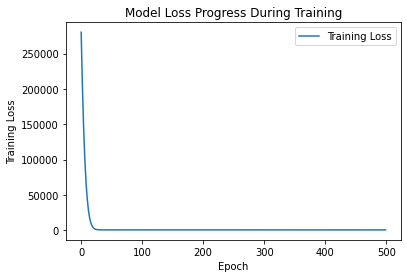

In [27]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [28]:
model.get_weights()

[array([[21.40993]], dtype=float32), array([44.779926], dtype=float32)]

In [29]:
# Use the trained model to perform predictions


Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)


Revenue Predictions Using Trained ANN = [[151.82957]]


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

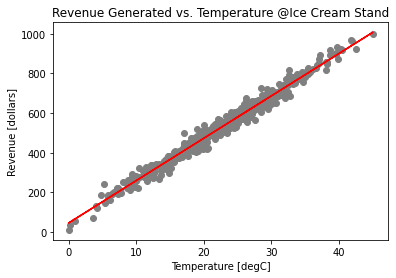

In [30]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

# STEP #6 (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

In [31]:
X_train = X_train.values.reshape(-1,1)

In [32]:
X_train.shape

(500, 1)

In [33]:
y_train = y_train.values.reshape(-1,1)

In [34]:
y_train.shape

(500, 1)

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [36]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[23.22442357]]
Linear Model Coeff(b) 0.0


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

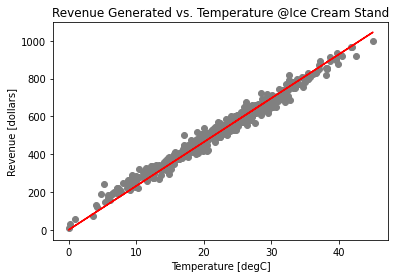

In [37]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')